In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import optimizers
import numpy as np
import pickle
from sklearn import preprocessing

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

enc = preprocessing.OneHotEncoder()
enc.fit(y_train)
y_train = enc.transform(y_train).toarray()

print (x_train.shape)
print (y_train)
print (x_test.shape)

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
(50000, 32, 32, 3)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
(10000, 32, 32, 3)


In [2]:
# from tensorflow.keras.models import load_model

# feature_extractor = load_model('model-features/features.h5')
# print ("Models loaded!")

Models loaded!


In [3]:
# kalo belum ada pickle nya, eksekusi cell ini
# features = feature_extractor.predict(x_test)
# print (features.shape)

(10000, 10)


In [4]:
#pakai simple ae
# feature_encoder = load_model('model-ae/simple-ae-encoder.h5')

In [17]:
#pakai sparse ae
# feature_encoder = load_model('model-ae/sparse-ae-encoder.h5')

In [4]:
#pakai deep ae
# feature_encoder = load_model('model-ae/deep-ae-encoder.h5')

In [14]:
#pakai denoising ae
# feature_encoder = load_model('model-ae/denoising-ae-encoder.h5')

In [15]:
# kalo belum ada pickle vectors nya, eksekusi cell ini
# pickle_in = open("model-features/cbir-resnet-features.pickle", "rb")
# features = pickle.load(pickle_in)
# vectors = feature_encoder.predict(features)
# print (vectors.shape)

(10000, 32)


In [16]:
# save pickle
# pickle_out = open("pickle-test/cbir-resnet-vectors-denoising-test.pickle", "wb")
# pickle.dump(vectors, pickle_out)
# pickle_out.close()

In [35]:
# kalo udah ada pickle nya
# import pickle

#simple
# pickle_in = open("model-features/cbir-resnet-vectors-simple.pickle", "rb")
# pickle_in = open("pickle-test/cbir-resnet-vectors-simple-test.pickle", "rb")

#sparse
# pickle_in = open("model-features/cbir-resnet-vectors-sparse.pickle", "rb")
# pickle_in = open("pickle-test/cbir-resnet-vectors-sparse-test.pickle", "rb")

#deep
# pickle_in = open("model-features/cbir-resnet-vectors-deep.pickle", "rb")
# pickle_in = open("pickle-test/cbir-resnet-vectors-deep-test.pickle", "rb")

#denoising
# pickle_in = open("model-features/cbir-resnet-vectors-denoising.pickle", "rb")
pickle_in = open("pickle-test/cbir-resnet-vectors-denoising-test.pickle", "rb")

vectors = pickle.load(pickle_in)
# print (vectors_train.shape)
print (vectors.shape)

(10000, 32)


In [36]:
import numpy as np
from annoy import AnnoyIndex

index = AnnoyIndex(vectors.shape[1], metric='angular' )
for i in range(vectors.shape[0]):
    index.add_item(i, vectors[i,:].tolist())

In [37]:
index.build(20)
# dibutuhkan untuk save index, jika proses build lama eksekusi save index agar bisa load & tidak perlu build ulang
# index.save("model-index/index.ann")

True

In [38]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(y_train.shape)
print(y_train[:, :].shape)
lookup = np.argmax(y_train[:, :], axis=1)
lookup_test = y_test.flatten()

(50000, 10)
(50000, 10)


Querying with this random image


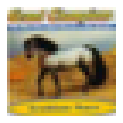

horse


In [39]:
import random
# choice_idx = random.randrange(10000)
choice_idx = 339
# results = index.get_nns_by_item(choice_idx, 6000)
results = index.get_nns_by_vector(vectors[choice_idx], 1000)

print ("Querying with this random image")

import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(x_test[choice_idx])
plt.axis('off')
plt.show()
print (labels[lookup_test[choice_idx]])
# print (lookup[choice_idx])

Search results:


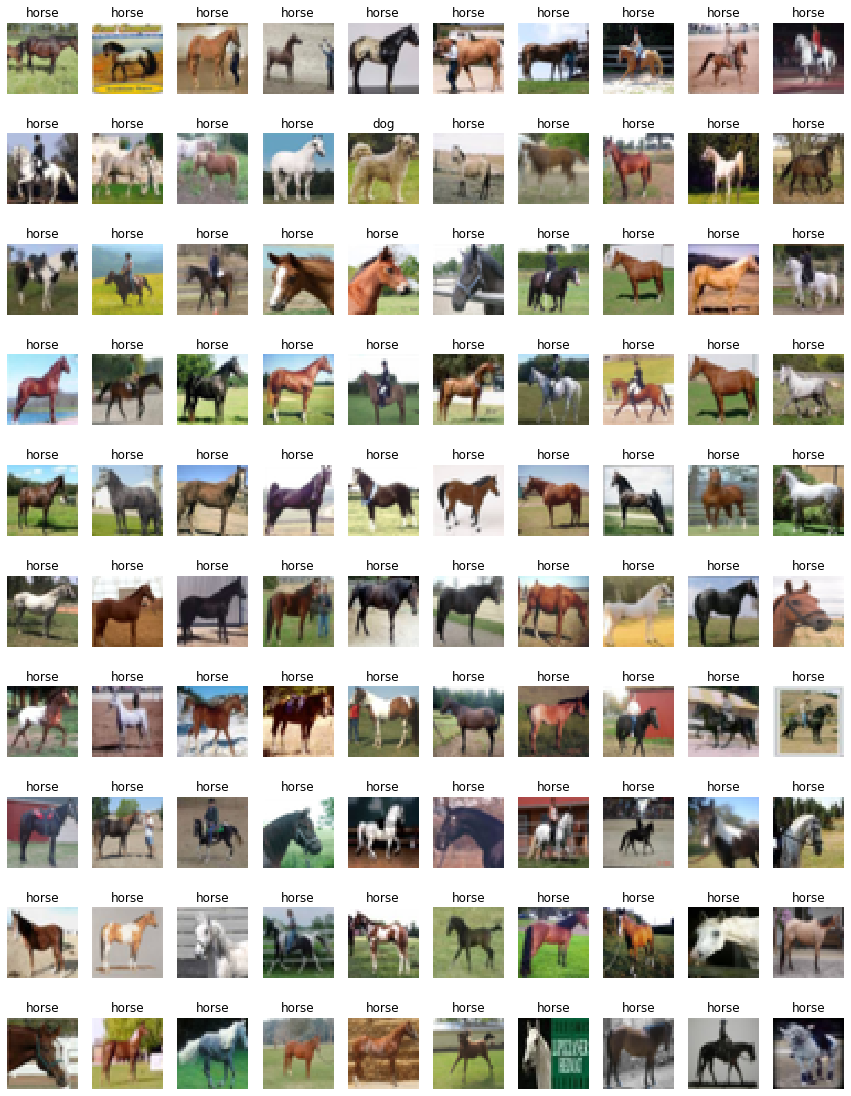

In [40]:
import matplotlib.pyplot as plt

print ("Search results:")

w=10
h=10
fig=plt.figure(figsize=(15,20))
columns = 10
rows = 10
for i in range(100):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(x_test[results[i]])
    plt.title(str(labels[lookup_test[results[i]]]))
    plt.axis('off')
plt.show()

In [41]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
t = np.ones(1000).astype(float)
p = np.array([lookup_test[x] == lookup_test[choice_idx] for x in results]).astype(float)

print ("F1 Score for this search:", f1_score(t, p))
print ("Accuracy Score for this search:", accuracy_score(t, p))
print ("Precision Score for this search:", precision_score(t, p))
print ("Recall Score for this search:", recall_score(t, p))

F1 Score for this search: 0.9429175475687104
Accuracy Score for this search: 0.892
Precision Score for this search: 1.0
Recall Score for this search: 0.892


In [17]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(vectors, vectors))
#> [[ 1.          0.48927489  0.37139068]
#>  [ 0.48927489  1.          0.38829014]
#>  [ 0.37139068  0.38829014  1.        ]]

[[0.9999998  0.6114455  0.57778496 ... 0.62608695 0.658367   0.6563637 ]
 [0.6114455  0.9999998  0.93788373 ... 0.9096048  0.69447404 0.68143713]
 [0.57778496 0.93788373 0.9999999  ... 0.8743373  0.712008   0.7103741 ]
 ...
 [0.62608695 0.9096048  0.8743373  ... 0.99999976 0.76017827 0.76091814]
 [0.658367   0.69447404 0.712008   ... 0.76017827 0.9999999  0.99824363]
 [0.6563637  0.68143713 0.7103741  ... 0.76091814 0.99824363 1.        ]]
